# Get started

Imoprt modules we'll need to get started



[Requests](http://docs.python-requests.org/en/master/)

[Beautiful soup](https://www.crummy.com/software/BeautifulSoup/)

[Pandas](https://pandas.pydata.org/)

[NLTK](https://www.nltk.org/)


When you have time go read more about them from the links above!

In [0]:
# import request & beautiful soup
# request is for getting content from a URL
# beautiful soup is used to parse through the HTML we get from requests

import requests
from bs4 import BeautifulSoup

Make a request to this page [sageelliott.com/scrape/](https://sageelliott.com/scrape/)

This page has elements I made that will be good practice for web scraping


In [0]:
# Make the request to a url
# Assign it to a variable 'r'

r = requests.get('https://sageelliott.com/scrape/')

In [3]:
# Lets look at what the request content looks like

print(r.content)

b'<!DOCTYPE html>\n<html>\n\n  <head>\n  <meta charset="utf-8">\n  <meta http-equiv="X-UA-Compatible" content="IE=edge">\n  <meta name="viewport" content="width=device-width, initial-scale=1">\n\n  <title>Web Scraping | Sage Elliott \xf0\x9f\xa5\x91</title>\n  <meta name="description" content="I make things.">\n\n  <link rel="stylesheet" href="/css/main.css">\n  <link rel="canonical" href="http://sageelliott.com/scrape/">\n  <link rel="alternate" type="application/rss+xml" title="Sage Elliott \xf0\x9f\xa5\x91" href="http://sageelliott.com/feed.xml">\n  <script src="https://code.jquery.com/jquery-2.1.3.min.js"></script>\n  <script src="/js/bootstrap.min.js"></script>\n  <script src="/js/script.js"></script>\n  <link rel="stylesheet" href="/css/bootstrap.min.css">\n  <link rel="stylesheet" href="/css/bootstrap-theme.min.css">\n  <link rel="stylesheet" href="/css/style.css">\n  <link rel="stylesheet" href="/css/responsive.css">\n  <link href=\'https://fonts.googleapis.com/css?family=Pathw

#### That is a really big, really ugly string! 

Lets use Beautiful Soup on content from requests 
- This will make it much more readble when we print it out and allow us to use more Beautifulsoup functionality

In [0]:
# identify/tag the content (same thing we just printed)
c = r.content
# use Beautifulsoup on content from request (again, content we just printed)
soup = BeautifulSoup(c)

In [6]:
# Look at the content formatted with Beautifulsoup
print(soup)

<!DOCTYPE html>
<html>
<head>
<meta charset="utf-8"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta content="width=device-width, initial-scale=1" name="viewport"/>
<title>Web Scraping | Sage Elliott 🥑</title>
<meta content="I make things." name="description"/>
<link href="/css/main.css" rel="stylesheet"/>
<link href="http://sageelliott.com/scrape/" rel="canonical"/>
<link href="http://sageelliott.com/feed.xml" rel="alternate" title="Sage Elliott 🥑" type="application/rss+xml"/>
<script src="https://code.jquery.com/jquery-2.1.3.min.js"></script>
<script src="/js/bootstrap.min.js"></script>
<script src="/js/script.js"></script>
<link href="/css/bootstrap.min.css" rel="stylesheet"/>
<link href="/css/bootstrap-theme.min.css" rel="stylesheet"/>
<link href="/css/style.css" rel="stylesheet"/>
<link href="/css/responsive.css" rel="stylesheet"/>
<link href="https://fonts.googleapis.com/css?family=Pathway+Gothic+One|Alegreya:400italic,700italic,400,700|Alegreya+SC" rel="stylesheet"

#### Uhhhh.. What?
- That's difficult to read...
  - We can make it look better (more readable) by using the prettify() function from Beautiful soup 
    - prettify() indents HTML like it should be in the web page
      - i.e. you can think "this is how the code actually looks"


In [7]:
# This can make reading teh HTML a little be easier
print(soup.prettify())

<!DOCTYPE html>
<html>
 <head>
  <meta charset="utf-8"/>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <meta content="width=device-width, initial-scale=1" name="viewport"/>
  <title>
   Web Scraping | Sage Elliott 🥑
  </title>
  <meta content="I make things." name="description"/>
  <link href="/css/main.css" rel="stylesheet"/>
  <link href="http://sageelliott.com/scrape/" rel="canonical"/>
  <link href="http://sageelliott.com/feed.xml" rel="alternate" title="Sage Elliott 🥑" type="application/rss+xml"/>
  <script src="https://code.jquery.com/jquery-2.1.3.min.js">
  </script>
  <script src="/js/bootstrap.min.js">
  </script>
  <script src="/js/script.js">
  </script>
  <link href="/css/bootstrap.min.css" rel="stylesheet"/>
  <link href="/css/bootstrap-theme.min.css" rel="stylesheet"/>
  <link href="/css/style.css" rel="stylesheet"/>
  <link href="/css/responsive.css" rel="stylesheet"/>
  <link href="https://fonts.googleapis.com/css?family=Pathway+Gothic+One|Alegreya:400itali

Often the content that you want to scrape will be inside a tag like `div` or similar element. 

- In this case when we look at our HTML we see that the actual content of the page is inside of a `div` with a class of `main-content`. 

- Lets grab all the content inside that `div` and save it to a variable. 


**We're going from this**

In [8]:
soup

<!DOCTYPE html>
<html>
<head>
<meta charset="utf-8"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta content="width=device-width, initial-scale=1" name="viewport"/>
<title>Web Scraping | Sage Elliott 🥑</title>
<meta content="I make things." name="description"/>
<link href="/css/main.css" rel="stylesheet"/>
<link href="http://sageelliott.com/scrape/" rel="canonical"/>
<link href="http://sageelliott.com/feed.xml" rel="alternate" title="Sage Elliott 🥑" type="application/rss+xml"/>
<script src="https://code.jquery.com/jquery-2.1.3.min.js"></script>
<script src="/js/bootstrap.min.js"></script>
<script src="/js/script.js"></script>
<link href="/css/bootstrap.min.css" rel="stylesheet"/>
<link href="/css/bootstrap-theme.min.css" rel="stylesheet"/>
<link href="/css/style.css" rel="stylesheet"/>
<link href="/css/responsive.css" rel="stylesheet"/>
<link href="https://fonts.googleapis.com/css?family=Pathway+Gothic+One|Alegreya:400italic,700italic,400,700|Alegreya+SC" rel="stylesheet"

**To this**

In [9]:
# get elements within the 'main-content' tag
main_content = soup.find('div', attrs = {'class': 'main-content'})
print(main_content)

<div class="main-content">
<h1>Lots of stuff to try web scraping on!</h1>
<p>This page is full of different tags that you will commonly see
    out in the wild on the web!</p>
<h1>Example headlines</h1>
<h2 class="headline">I love this!</h2>
<h2 class="headline">I hate this so much!</h2>
<h2 class="headline">The dumbest thing happened</h2>
<h2 class="headline">This is a great workshop!</h2>
<h2 class="headline">This workshop is horrible</h2>
<h2 class="headline">I'm tired...</h2>
<h2 class="headline">This thing is ok...</h2>
<h1>Example unordered list</h1>
<ul>
<li>Elon Musk is worth $21,000,000,000</li>
<li>Jeff Bezos is worth $137,000,400,000 </li>
<li>Bill Gates is worth $95,000,000,000</li>
<li>Mark Zuckerburg is worth $54,600,000,000</li>
</ul>
<h1>Example links</h1>
<a href="https://www.galvanize.com/data-science-prep">Data Science Free prep</a>
<a href="http://docs.python-requests.org/en/master/">Python Requests</a>
<a href="https://www.crummy.com/software/BeautifulSoup/">Beauti

Lets drill deeper down into our content and look at different ways of selecting elements within our main-content div.

We want to get just our items inside of the list

I'm going to be using examples like the above for most of this workshop, but I want to show that you could also chain the elements like the example below:

Lets get the headline elements

When we look at the HTML we can see that they all have `h2` tags. 


What is "h2"
- idk, ask a web-dev...
    
# Header
## Header 2
### Header 3
#### something smaller than header
- **Not the same as bold**

In [10]:
# Try to get h2 ("Header 2") elements
content = main_content.find('h2').text

print(content)

I love this!


Oh no! It looks like when using `.find()` it only returns the first matching element on the page.

We can get all the matching elements by using the`.find_all()` method

In [11]:
# get all the h2s on the page and display each one
content = main_content.find_all('h2')

print(content)


[<h2 class="headline">I love this!</h2>, <h2 class="headline">I hate this so much!</h2>, <h2 class="headline">The dumbest thing happened</h2>, <h2 class="headline">This is a great workshop!</h2>, <h2 class="headline">This workshop is horrible</h2>, <h2 class="headline">I'm tired...</h2>, <h2 class="headline">This thing is ok...</h2>]


Notice when we print out content above it have the HTML h2 elements seperated by commas inside brackets []. This is called a `list`. Its ofen used to store multiple values in. 

Lists are iterable, and we can go through each item inside to print them out



In [12]:
# Iterate content list and print out text inside each h2 element

for h2 in content:
    print(h2.text)

I love this!
I hate this so much!
The dumbest thing happened
This is a great workshop!
This workshop is horrible
I'm tired...
This thing is ok...


# Text Analysis

Lets do some sentiment analysis on our headlines `h2` elements

Maybe we're looking at a list of News headlines and we only want to read the ones we think are positive

In [0]:
# get all the h2s on the page and display each one
content = main_content.find_all('h2')

In [14]:
print(content)

[<h2 class="headline">I love this!</h2>, <h2 class="headline">I hate this so much!</h2>, <h2 class="headline">The dumbest thing happened</h2>, <h2 class="headline">This is a great workshop!</h2>, <h2 class="headline">This workshop is horrible</h2>, <h2 class="headline">I'm tired...</h2>, <h2 class="headline">This thing is ok...</h2>]


In [0]:
# start a collection (list) for dataset 
dataset = []

# go through each item in content
for h2 in content:
    # identify the text of that item
    text = h2.text
    # add that text to the dataset (list)
    dataset.append(text)

In [16]:
# show me the whole list
print(dataset)

['I love this!', 'I hate this so much!', 'The dumbest thing happened', 'This is a great workshop!', 'This workshop is horrible', "I'm tired...", 'This thing is ok...']


In [17]:
# show me each item
for item in dataset:
  print(item)

I love this!
I hate this so much!
The dumbest thing happened
This is a great workshop!
This workshop is horrible
I'm tired...
This thing is ok...


## Natural Language Processing
Import [NLTK](https://www.nltk.org/)(Natural Language Toolkit) python module

Yet again we're only going to use just a tiny bit of NLTK, but if you're intertested in Natural Language Processing you should totally read more about it!!!

In [18]:
import pandas as pd
import nltk
# basically an import (already known to ntlk)
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [19]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

def sentiment(sentence):
    # id/tag the analyzer
    sentiment = SentimentIntensityAnalyzer()
    # make a score on the sentence
    score = sentiment.polarity_scores(sentence)
    # return the analyzer's score of the sentence
    return score 

/usr/local/lib/python3.6/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [20]:
for headline in dataset:
  print("\n")
  print(headline)
  print(sentiment(headline))



I love this!
{'neg': 0.0, 'neu': 0.182, 'pos': 0.818, 'compound': 0.6696}


I hate this so much!
{'neg': 0.571, 'neu': 0.429, 'pos': 0.0, 'compound': -0.6114}


The dumbest thing happened
{'neg': 0.524, 'neu': 0.476, 'pos': 0.0, 'compound': -0.5106}


This is a great workshop!
{'neg': 0.0, 'neu': 0.406, 'pos': 0.594, 'compound': 0.6588}


This workshop is horrible
{'neg': 0.538, 'neu': 0.462, 'pos': 0.0, 'compound': -0.5423}


I'm tired...
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


This thing is ok...
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


### do that without all that work?
- yes, it's doable
  - for example, if we happened to have all the headlines in a list

In [0]:
# make a list of the headlines
dataset = ['I love this', 'I hate this so much', 
           'The dumbest thing happened', 'This is a great workshop', 
           'This workshop is horrible', "I'm tired", 'This thing is ok']

# import sentiment analyzer (just like above)
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# define sentiment function (just like above)
def sentiment(sentence):    
    sentiment = SentimentIntensityAnalyzer()
    score = sentiment.polarity_scores(sentence)
    return score

In [22]:
# go through each 'headline' in the dataset
for headline in dataset:
  # print a blank line
  print("\n")
  # print the headline
  print(headline)
  # print the outcome of sentiment() function on that headline
  print(sentiment(headline))



I love this
{'neg': 0.0, 'neu': 0.192, 'pos': 0.808, 'compound': 0.6369}


I hate this so much
{'neg': 0.552, 'neu': 0.448, 'pos': 0.0, 'compound': -0.5719}


The dumbest thing happened
{'neg': 0.524, 'neu': 0.476, 'pos': 0.0, 'compound': -0.5106}


This is a great workshop
{'neg': 0.0, 'neu': 0.423, 'pos': 0.577, 'compound': 0.6249}


This workshop is horrible
{'neg': 0.538, 'neu': 0.462, 'pos': 0.0, 'compound': -0.5423}


I'm tired
{'neg': 0.744, 'neu': 0.256, 'pos': 0.0, 'compound': -0.4404}


This thing is ok
{'neg': 0.0, 'neu': 0.577, 'pos': 0.423, 'compound': 0.296}


### Can the results look better?
- Yes, lets use `Pandas` to make our output better

In [23]:
import pandas as pd

# make a list of the results of sentiment on each "headline" in the dataset
nltk_results = [sentiment(headline) for headline in dataset]

# print out those results
print(nltk_results)

[{'neg': 0.0, 'neu': 0.192, 'pos': 0.808, 'compound': 0.6369}, {'neg': 0.552, 'neu': 0.448, 'pos': 0.0, 'compound': -0.5719}, {'neg': 0.524, 'neu': 0.476, 'pos': 0.0, 'compound': -0.5106}, {'neg': 0.0, 'neu': 0.423, 'pos': 0.577, 'compound': 0.6249}, {'neg': 0.538, 'neu': 0.462, 'pos': 0.0, 'compound': -0.5423}, {'neg': 0.744, 'neu': 0.256, 'pos': 0.0, 'compound': -0.4404}, {'neg': 0.0, 'neu': 0.577, 'pos': 0.423, 'compound': 0.296}]


In [24]:
# make a pandas dataframe of the the results
results_df = pd.DataFrame(nltk_results)
# make a single column dataframe of the sentences & title column 'headline'
text_df = pd.DataFrame(dataset, columns = ['headline'])

# combine those two dataframes 
nltk_df = text_df.join(results_df)

# display the combined dataframe
nltk_df

,headline,compound,neg,neu,pos
0,I love this,0.6369,0.000,0.192,0.808
1,I hate this so much,-0.5719,0.552,0.448,0.000
2,The dumbest thing happened,-0.5106,0.524,0.476,0.000
3,This is a great workshop,0.6249,0.000,0.423,0.577
4,This workshop is horrible,-0.5423,0.538,0.462,0.000
5,I'm tired,-0.4404,0.744,0.256,0.000
6,This thing is ok,0.2960,0.000,0.577,0.423


#### Let's plot out those results

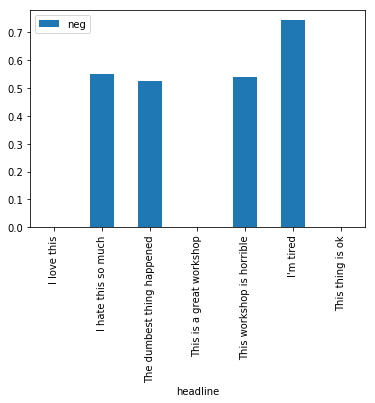

In [25]:
nltk_df.plot(kind='bar', x='headline', y='neg');

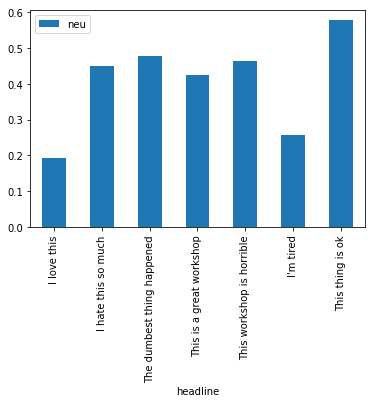

In [26]:
nltk_df.plot(kind='bar', x = 'headline', y = 'neu');

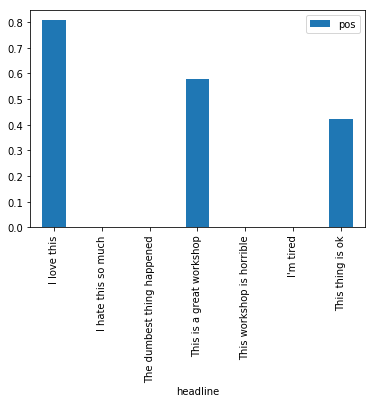

In [27]:
nltk_df.plot(kind='bar', x = 'headline', y = 'pos');

# Back to GitHub repo

https://github.com/gumdropsteve/intro-data-science/tree/master/intro_machine_learning
  